## Exercise 0: Dataset Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from scipy.spatial.distance import pdist


In [2]:
import os
from glob import glob
PATH = "Downloads/UCRArchive_2018"
EXT = "*.tsv"

#Extracting the directory list
all_tsv_files = [file
                    for path, subdir, files in os.walk(PATH)
                    for file in glob(os.path.join(path, EXT))]
#print(all_csv_files)
dirs = os.listdir(PATH)
dirs.remove('.DS_Store')
#print(dirs)
df_list = []
name_list = []
for i in dirs:  #traversing through each sub directory to merge train and test sets
    path = f'Downloads/UCRArchive_2018/{i}/{i}'
    if i != 'Missing_value_and_variable_length_datasets_adjusted':
        #print(i)
        train = pd.read_csv(path+'_TRAIN.tsv', sep = '\t', header=None)
        test = pd.read_csv(path+'_TEST.tsv', sep = '\t', header=None)

        df = pd.concat((train,test),axis=0) #merging
        df.rename(lambda x : str(x), axis = 1 ,inplace=True)
        
        mean = df.mean(axis=0)  #Finding mean and standard deviation of each set
        std = df.std(axis=0)
        
        
        df.iloc[:,1:] = (df.iloc[:,1:] - mean)/std  #normalization of datasets
        df_list.append(df)  #Appending the data sets and their names
        name_list.append(i)

print(len(df_list))

128


In [3]:
print(name_list)

['Haptics', 'SyntheticControl', 'Worms', 'Computers', 'HouseTwenty', 'GestureMidAirD3', 'Chinatown', 'UWaveGestureLibraryAll', 'Strawberry', 'Car', 'GunPointAgeSpan', 'GestureMidAirD2', 'BeetleFly', 'Wafer', 'CBF', 'Adiac', 'ItalyPowerDemand', 'Yoga', 'AllGestureWiimoteY', 'Trace', 'PigAirwayPressure', 'ShapesAll', 'Beef', 'GesturePebbleZ2', 'Mallat', 'GunPointOldVersusYoung', 'MiddlePhalanxTW', 'AllGestureWiimoteX', 'Meat', 'Herring', 'MiddlePhalanxOutlineCorrect', 'InsectEPGRegularTrain', 'FordA', 'SwedishLeaf', 'InlineSkate', 'DodgerLoopDay', 'UMD', 'CricketY', 'WormsTwoClass', 'SmoothSubspace', 'OSULeaf', 'Ham', 'CricketX', 'SonyAIBORobotSurface1', 'ToeSegmentation1', 'ScreenType', 'PigArtPressure', 'SmallKitchenAppliances', 'Crop', 'MoteStrain', 'MelbournePedestrian', 'ECGFiveDays', 'Wine', 'SemgHandMovementCh2', 'FreezerSmallTrain', 'UWaveGestureLibraryZ', 'NonInvasiveFetalECGThorax1', 'TwoLeadECG', 'Lightning7', 'Phoneme', 'SemgHandSubjectCh2', 'DodgerLoopWeekend', 'MiddlePhalan

In [4]:
print(df_list[0])
print(name_list[0])

     0   1         2         3         4         5         6         7  \
0    5 NaN  0.518946 -0.779491 -0.521703 -0.153770 -0.206354 -0.208593   
1    2 NaN  0.628013 -0.703497 -0.637235  1.297243  1.347831  1.353957   
2    4 NaN  0.013461  0.324697  0.781660  0.279801  0.295622  0.347937   
3    3 NaN  1.078743 -0.703667  0.250283  0.238052  0.204340  0.179902   
4    5 NaN  0.660477 -1.008926 -0.212049  0.087863  0.093671  0.120723   
..  ..  ..       ...       ...       ...       ...       ...       ...   
303  3 NaN  0.360552  0.150532 -0.859037  0.609707  0.642581  0.641472   
304  4 NaN -0.658304 -0.171879  1.037005 -0.135317 -0.144805 -0.239020   
305  1 NaN  0.094399 -0.059132  0.526768  0.519987  0.477199  0.464348   
306  2 NaN  0.421219  0.060157  0.241965  0.482527  0.508067  0.557591   
307  3 NaN  1.450772  1.301938 -1.677016 -2.622326 -2.601326 -2.546164   

            8         9  ...      1083      1084      1085      1086  \
0   -0.263471 -0.298217  ... -0.552797 

Function to implement stratifies sampling and splitting into train, test and validation sets according to the ratio given (70 :15 :15 ). Then we will further put the target values (y values ) to a different data set

In [5]:
def sampling(df):
    df = df.sample(frac = 1,random_state = 3116)
    classes = df.iloc[:,0].nunique() # Finding the number of samples in each class
    
    #print(classes)
    df_groups = df.groupby(by='0')  # grouping data according to the target class which is the first column
    #print(len(df_groups))
    train = pd.DataFrame()
    val = pd.DataFrame()
    test = pd.DataFrame()

    
    for count, num in df_groups: # splitting into sets based on the strata (from groupby)
        train = train.append(num.iloc[:int(0.7*len(num))])
        val = val.append(num.iloc[int(0.7*len(num)):int(0.85*len(num))])
        test = test.append(num.iloc[int(0.85*len(num)):])
    
    y_train = np.array(train.iloc[:,0])   # removing y values to a different array
    x_train = np.array(train.iloc[:,1:])
    y_test = np.array(test.iloc[:,0])
    x_test = np.array(test.iloc[:,1:])
    y_val = np.array(val.iloc[:,0])
    x_val = np.array(val.iloc[:,1:])
    
    #print(x_test)
    
    return x_train,y_train,x_val,y_val,x_test,y_test

In [6]:
count = 0
new_list = []
new_names = []
x_train_list = []
y_train_list = []
x_val_list = []
y_val_list = []
x_test_list = []
y_test_list = []

# Since there is limitation in the resources ( time and memory) I am only considering 5 data sets. 
# Only those data sets with Nan values ( missing values ) are taken for performing KNN

for i in range (len(df_list)):
    while (count < 5):
        if df_list[i].isna().any().any(): # checking if missing values are present
            new_list.append(df_list[i])   # appending to new list
            new_names.append(name_list[i])
            
            x_train,y_train,x_val,y_val,x_test,y_test = sampling(df_list[i]) # performing sampling and partitioning
            
            x_train_list.append(x_train)
            y_train_list.append(y_train)
            x_test_list.append(x_test)
            y_test_list.append(y_test)
            x_val_list.append(x_val)
            y_val_list.append(y_val)
            
            count+=1

print((x_test.shape))
print(x_train.shape[1])
print(x_val.shape)

(70, 1092)
1092
(70, 1092)


A plot indicating the total length of samples (across all datasets)

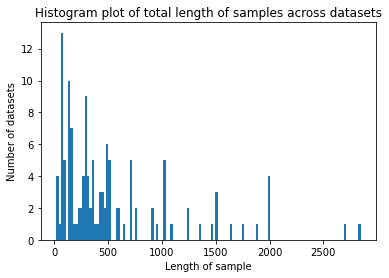

In [7]:
list_samples = []
for i in range(len(df_list)):
    list_samples.append(df_list[i].shape[1])

plt.hist(list_samples,bins=len(df_list))
plt.title('Histogram plot of total length of samples across datasets')
plt.xlabel('Length of sample')
plt.ylabel('Number of datasets')
plt.show()

We observe that most data sets have length of sample(features) between 0 and 500.

A plot indicating the total number of classes  (across all datasets)

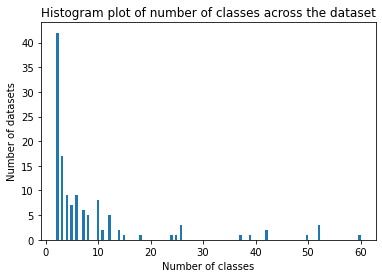

In [8]:
class_list = []
for i in range(len(df_list)):
        class_list.append(df_list[i].iloc[:,0].nunique())
plt.hist(class_list,bins=len(df_list))
plt.title('Histogram plot of number of classes across the dataset')
plt.xlabel('Number of classes')
plt.ylabel('Number of datasets')
plt.show()

We observe that most datasets have classes between 0 and 10

A plot indicating the total number of samples (across all datasets)

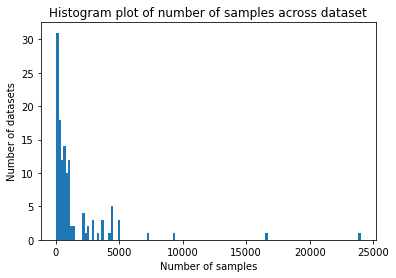

In [9]:
len_list = []
for i in range(len(df_list)):
    len_list.append(len(df_list[i]))
plt.hist(len_list,bins=len(df_list))
plt.title('Histogram plot of number of samples across dataset')
plt.xlabel('Number of samples')
plt.ylabel('Number of datasets')
plt.show()


We observe that the number of samples or length of the data set is most commonly between 0 - 5000.

## Exercise 1: Dataset Imputation with KNN

For KNN, due to memory and time constraints , we are only taking 5 datasets which has missing values into consideration. Code for the selection of dataset is written above

Function to find the euclidean distance between different values and to find the new value as the mean of the lowest distance neighbours.
The number of neighbours to be taken is defined by the choice of k.

In [25]:
def k_neighbour(required,others,k_list):
    x = (required - others)**2 # finding eucleidian distance between the required row and all other rows
    dist = np.sqrt(np.nansum(x,axis = -1))
    #print(len(dist))
    neighbours = np.arange(0,len(others),1)
    #print(neighbours)
    sorted_neighbours = sorted(neighbours, key = lambda i : dist[i])  # sort neighbors in ascending order by their distance
    prediction = []
    for k in k_list:
        nearest_neighbours = sorted_neighbours[:k]
        nearest_neighbours = others[nearest_neighbours] 
        prediction.append(np.nanmean(nearest_neighbours,axis = 0)) # finding average of the nearest neighbours and appending the same
        
    return prediction



Function to implement grid search to find the best k value. The rmse value score is taken to find the best k. The k value resulting in minimum error between true value and predicted value is selected.

In [26]:

def grid_search(df):
    val = np.arange(1,5) # here I am taking 5 k values.
    predicted_values = np.zeros((len(val),len(df),df.shape[-1]-1))
    #print(len(df))
    for i in range(len(df)):
        required = df.iloc[i,1:].to_numpy()  # The missing value row
        sub = df.drop(index = i)
        others = sub.iloc[:,1:].to_numpy()   # The other rows
        predicted_values[:,i,:] = k_neighbour(required,others,val)
    original_values = df[:,1:].to_numpy()
    
    
    error_square = (predicted_values-original_values)**2 # Finding rmse value
    mean_per_sample = np.nanmean(error_square,axis = -1)                 # ignore missing values
    mean_per_dataset = np.nanmean(mean_per_sample,axis = -1)    
    rmse = np.sqrt(mean_per_dataset)
    best_k = val[np.argmin(rmse)]  # Finding best k 
    return best_k

Function to call gridsearch and find best k for each data set.

In [27]:
for i in range(len(new_list)):
    best_k = grid_search(new_list[i])
    print("best_k ",best_k)
    
    
    

<ipython-input-25-79e04dafbfa7>:12: RuntimeWarning: Mean of empty slice
  prediction.append(np.nanmean(nearest_neighbours,axis = 0)) # finding average of the nearest neighbours and appending the same


KeyError: '[308] not found in axis'

## Exercise 2: Time Series Classification with Various Distance Measures

For a selected number of datasets - to tune k using different distance measures provided in scipy library.

The distance function can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’

In [ ]:
distance_metrics = ["hamming", "jaccard", "euclidean","canberra"]
# Taking a random 4 measures due to limitation in time and memory

for i in range(len(new_list)):
    

## Exercise 3: Accelerating K-Nearest Neighbour Classifier

To implement the speed up strategies - Partial distances/ Lower Bounding and Local sensitive hashing on a data set with largest number of samples using euclidean distance measure.

In [20]:
largest=[]
maximum = 0

for i in range(len(df_list)):
    
    if df_list[i].shape[0] > maximum:
        largest = i
        maximum = df_list[i].shape[0]
print("data set with the largest no of samples is ",name_list[largest]," with length ",maximum)
print(largest)

data set with the largest no of samples is  Crop  with length  24000
48


In [21]:
print(df_list[48])

        0   1         2         3         4         5         6         7  \
0       1 NaN -0.694745 -1.098673 -1.205364 -1.238293 -1.022852 -1.031144   
1       1 NaN -0.825449 -1.209931 -1.128444 -0.991480 -0.183841  0.083845   
2       1 NaN -0.439562 -0.959679 -1.060573 -1.141186 -0.880133 -0.758819   
3       1 NaN -1.410503 -1.571802 -1.602408 -1.489153 -1.321263 -1.375403   
4       1 NaN -1.460295 -1.209931 -1.191790 -1.040033 -0.616321 -0.486495   
...    ..  ..       ...       ...       ...       ...       ...       ...   
16795  24 NaN  3.176573 -1.575533 -1.390877 -0.995526 -1.615349 -1.385680   
16796  24 NaN  0.680756 -1.224541 -1.359204 -1.096679 -1.161245 -1.246948   
16797  24 NaN -0.445786 -1.332788 -1.123919 -0.704206 -1.368836 -0.835892   
16798  24 NaN -0.022555 -0.983684 -0.716695 -0.433116 -1.239092 -0.712576   
16799  24 NaN -1.485191 -2.500078 -2.255098 -1.614582 -1.874837 -1.991987   

              8         9  ...        37        38        39        40  \
0

References

https://www.geeksforgeeks.org/implementation-of-k-nearest-neighbors-from-scratch-using-python/
https://stackoverflow.com/questions/61053224/how-can-i-read-multiple-csv-file-from-different-sub-directories-and-find-the-csv?rq=1
https://stackoverflow.com/questions/45759966/counting-unique-values-in-a-column-in-pandas-dataframe-like-in-qlik
